In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

# set up auto-reload
%load_ext autoreload
%autoreload 2

sys.path.append("..")
from mix_NCA.AGB_ABC_model import ABCModel
from mix_NCA.BiologicalMetrics import compare_abm_distributions
from mix_NCA.TissueModel import ComplexCellType
from mix_NCA.utils_formatting import create_latex_table_simulation


In [2]:
# load histories    
np.random.seed(42)

# load histories
histories = np.load("histories.npy")

In [7]:
# Fit ABM model

abm_model1 = ABCModel(grid_size=30, metric_type='covariance')

# Fit to data
abm_model1.fit(histories, n_particles=1000, epsilon=0.52)

with open('../models/abm_model_covariance.pkl', 'wb') as f:
    pickle.dump(abm_model1, file=f)


Using 36 processes


/home/salvatore.milite/miniconda3/envs/automata_project/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/salvatore.milite/miniconda3/envs/automata_project/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/salvatore.milite/miniconda3/envs/automata_project/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/salvatore.milite/miniconda3/envs/automata_project/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/salvatore.milite/miniconda3/envs/automata_project/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/salvatore.milite/miniconda3/e

Accepted 107 particles
Mean distance: 0.4180


In [20]:
abm_model2 = ABCModel(grid_size=30, metric_type='neighborhood')

# Fit to data
abm_model2.fit(histories, n_particles=1000, epsilon=0.4)


with open('../models/abm_model_neighborhood.pkl', 'wb') as f:
    pickle.dump(abm_model2, file=f)


Using 36 processes
Accepted 71 particles
Mean distance: 0.3847


In [17]:
abm_model3 = ABCModel(grid_size=30, metric_type='cell_distribution')

# Fit to data
abm_model3.fit(histories, n_particles=5000, epsilon=0.04)

with open('../models/abm_model_cell_distribution.pkl', 'wb') as f:
    pickle.dump(abm_model3, file=f)


Using 36 processes
Accepted 500 particles
Mean distance: 0.0368


In [4]:
# laod models
with open('../models/abm_model_covariance.pkl', 'rb') as f:
    abm_model1 = pickle.load(f)

with open('../models/abm_model_neighborhood.pkl', 'rb') as f:
    abm_model2 = pickle.load(f)

with open('../models/abm_model_cell_distribution.pkl', 'rb') as f:
    abm_model3 = pickle.load(f)


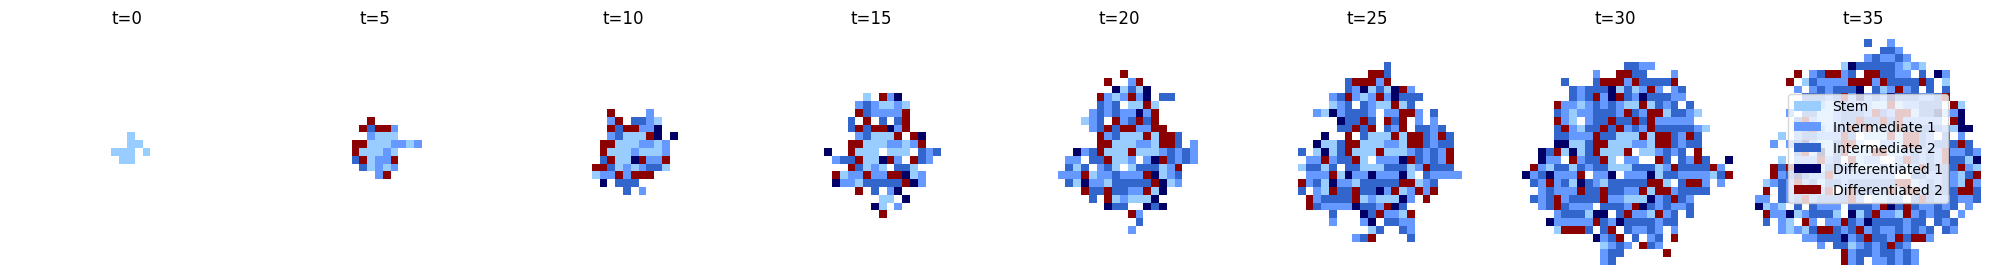

In [5]:
sim_data = abm_model1.simulate(steps=35)
fig = abm_model1.plot_simulation(sim_data, n_timesteps=35, plot_every = 5)
fig.show()

In [42]:
results = compare_abm_distributions(histories, [abm_model1, abm_model2, abm_model3], n_steps=35, device="cpu", n_evaluations=20)


True dataset shape after stacking: torch.Size([200, 30, 30])

Processing ABM Model 1


/group/sottoriva/salvatore.milite/automata_project/nd_NCA/notebooks/../mix_NCA/BiologicalMetrics.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_mask = torch.tensor(self.true_dataset == ct.value, device=self.device)
/group/sottoriva/salvatore.milite/automata_project/nd_NCA/notebooks/../mix_NCA/BiologicalMetrics.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gen_mask = torch.tensor(self.generated_dataset == ct.value, device=self.device)
/group/sottoriva/salvatore.milite/automata_project/nd_NCA/notebooks/../mix_NCA/BiologicalMetrics.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().r


Processing ABM Model 2

Processing ABM Model 3

Results with Standard Deviations:
| Model Type   |   KL Divergence | KL Divergence SD   |   Chi-Square | Chi-Square SD   |   Categorical MMD | Categorical MMD SD   |   Tumor Size Diff | Tumor Size Diff SD   |   Border Size Diff | Border Size Diff SD   |   Spatial Variance Diff | Spatial Variance Diff SD   |
|:-------------|----------------:|:-------------------|-------------:|:----------------|------------------:|:---------------------|------------------:|:---------------------|-------------------:|:----------------------|------------------------:|:---------------------------|
| ABM Model 1  |           0.386 | ±0.010             |        0.285 | ±0.005          |             0.06  | ±0.001               |             0.241 | ±0.012               |              0.055 | ±0.009                |                   0.121 | ±0.018                     |
| ABM Model 2  |           0.857 | ±0.010             |        0.488 | ±0.004          |    

In [48]:
# make latex table
print(create_latex_table_simulation(results))


\begin{table}[t]
\caption{Comparison of NCA variants}
\label{tab:nca-comparison}
\vskip 0.15in
\begin{center}
\begin{small}
\begin{sc}
\begin{tabular}{lcccc}
\toprule
Model & KL-div & $\chi^2$ & Size & Border-W \\
\midrule
ABM Model 1 & 0.386 ±0.010 & 0.285 ±0.005 & \textbf{0.241 ±0.012} & 0.055 ±0.009 \\
ABM Model 2 & 0.857 ±0.010 & 0.488 ±0.004 & 0.489 ±0.025 & 0.284 ±0.010 \\
ABM Model 3 & \textbf{0.152 ±0.002} & \textbf{0.132 ±0.001} & 0.241 ±0.010 & \textbf{0.054 ±0.006} \\
\bottomrule
\end{tabular}
\end{sc}
\end{small}
\end{center}
\vskip -0.1in
\end{table}



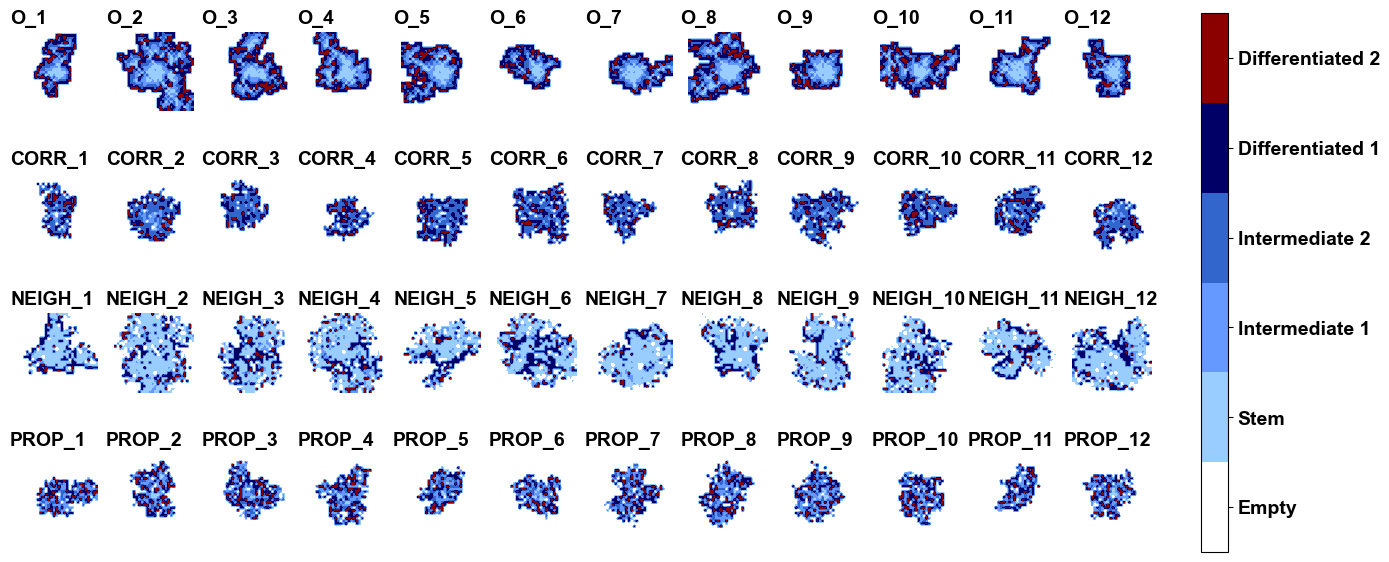

In [49]:
def plot_abm_comparison_grid(abm1, abm2, abm3, initial_state, 
                                n_examples=3, n_steps=35, figsize=(10, 15), 
                                cell_type_enum=ComplexCellType, device = "cuda"):
    """
    Plot a grid comparing original tissue with predictions from different NCA models.
    Paper-quality figure with subplot labels and consistent typography.
    """
    import matplotlib.pyplot as plt
    import torch
    import numpy as np
    import matplotlib.colors as mcolors
    from matplotlib.font_manager import FontProperties
    
    # Set up the figure style
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })
    
    # Create figure with grid layout
    fig, axes = plt.subplots(4, n_examples, figsize=figsize)
    
    # Create custom colormap
    colors = [cell_type.get_color() for cell_type in ComplexCellType]
    custom_cmap = mcolors.ListedColormap(colors)
    
    # Dictionary of models and their names
    models = {
        0: ('Original', None),
        1: ('ABM-CORR', abm1),
        2: ('ABM-NEIGH', abm2),
        3: ('ABM-PROP', abm3)
    }

    model_abbreviations = {
        0: 'O',
        1: 'CORR',
        2: 'NEIGH',
        3: 'PROP'
    }
    
    # Add subplot labels and plot content
    for row in range(4):
        model_name, model = models[row]
        
        for col in range(n_examples):
            ax = axes[row, col]
            
            # Add subplot labels (A1, A2, A3, B1, B2, B3, etc.)
            label = f'{model_abbreviations[row]}_{col + 1}'
            ax.text(-0.1, 1.1, label, transform=ax.transAxes, 
                   fontsize=14, fontweight='bold')
            
            if row == 0:
                # Plot original state
                ax.imshow(
                    initial_state[col][-1],
                    cmap=custom_cmap,
                    vmin=0,
                    vmax=len(cell_type_enum)-1
                )
                if col == 0:
                    ax.set_ylabel(model_name, fontsize=14, fontweight='bold')
                #ax.set_title(f'Example {col + 1}', fontsize=14, pad=10)
            else:
                # Run simulation and plot results
                with torch.no_grad():
                    torch.manual_seed(col)
                    
                    sim_data = model.simulate(steps=n_steps)
                    ax.imshow(
                        sim_data[-1].squeeze(),
                        cmap=custom_cmap,
                        vmin=0,
                        vmax=len(cell_type_enum)-1
                    )
                    if col == 0:
                        ax.set_ylabel(model_name, fontsize=14, fontweight='bold')
            
            ax.axis('off')
    
    # Add colorbar with improved styling
    norm = plt.Normalize(vmin=-0.5, vmax=len(cell_type_enum)-0.5)
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
    cbar.set_ticks(range(len(cell_type_enum)))
    cbar.set_ticklabels([ct.name.replace('_', ' ').title() for ct in cell_type_enum])
    cbar.ax.tick_params(labelsize=14)
    for tick in cbar.ax.yaxis.get_major_ticks():
        tick.label2.set_fontweight('bold')
    cbar.set_label('', fontsize=14, fontweight='bold')
    
    # Adjust layout
    #plt.tight_layout()
    
    return fig


fig = plot_abm_comparison_grid(abm_model1, abm_model2, abm_model3, histories, n_examples=12, n_steps=35, figsize=(16, 7))
# save figure
fig.savefig("../abm_comparison_grid.pdf", dpi=300, bbox_inches="tight", format="pdf")